# 6.6 Sourcing and Analyzing Time Series Data
###### This dataset, taken from "Bitcoin Data Insights," gives daily insights into several Bitcoin indicators with a one-day delay. It is created by the Blockchain website. Specifically, it gives information on the daily market price of Bitcoin in US dollars (USD).

## This script contains the following:
## 1. Importing libraries and data
## 2. Subsetting, wrangling, and cleaning time-series data
## 3. Time-series analysis: decomposition
## 4. Testing for stationarity
## 5. Stationarizing the data

# 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")  # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.


plt.style.use('fivethirtyeight')

In [2]:
quandl.ApiConfig.api_key = 'dQpvdZ2YzANF2NnHGiye'

In [10]:
data = quandl.get_table('QDL/BCHAIN', code='MKPRU')

In [11]:
data.head()

,code,date,value
None,,,
0,MKPRU,2024-04-22,64949.79
1,MKPRU,2024-04-21,64991.71
2,MKPRU,2024-04-20,63823.55
3,MKPRU,2024-04-19,63507.69
4,MKPRU,2024-04-18,61280.51


In [12]:
data.shape

(5589, 3)

In [13]:
#Remove the colum named 'code' since it is not needed
data.drop(columns=['code'], inplace=True)

In [14]:
data.isnull().sum()

date     0
value    0
dtype: int64

In [15]:
data.columns

Index(['date', 'value'], dtype='object')

In [16]:
type(data)

pandas.core.frame.DataFrame

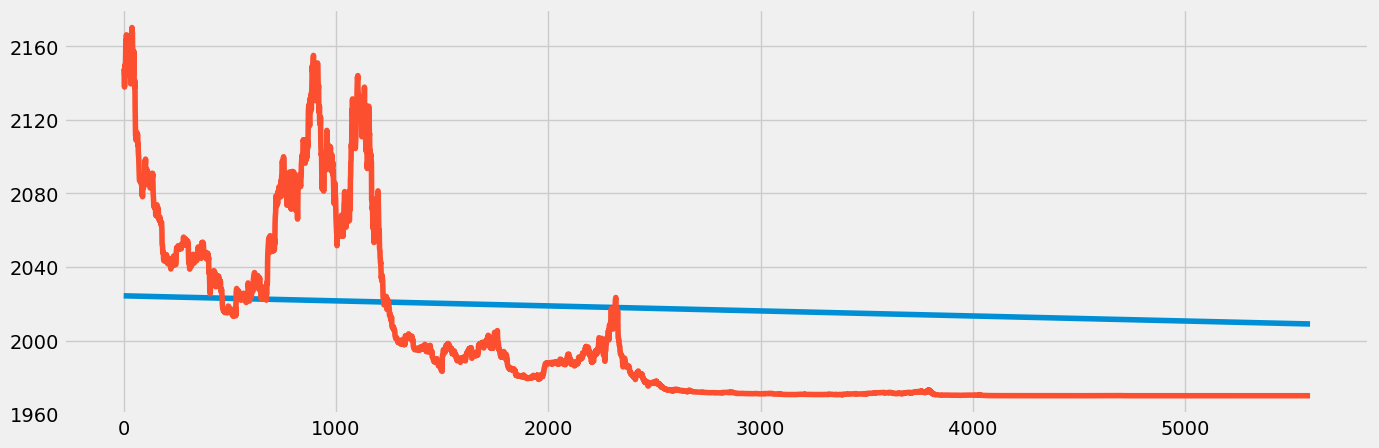

In [17]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

## 2. Subsetting, wrangling, and cleaning time-series data

In [18]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [19]:
data_2.head()

,None,date,value
0,0,2024-04-22,64949.79
1,1,2024-04-21,64991.71
2,2,2024-04-20,63823.55
3,3,2024-04-19,63507.69
4,4,2024-04-18,61280.51


In [21]:
#Remove the colum named 'None' since it is not needed
data_2.drop(columns=['None'], inplace=True)

In [30]:
# Subsetting data

data_sub = data.loc[(data['date'] >= '2023-01-01')]

In [31]:
data_sub.head()

,date,value
None,,
0,2024-04-22,64949.79
1,2024-04-21,64991.71
2,2024-04-20,63823.55
3,2024-04-19,63507.69
4,2024-04-18,61280.51


In [32]:
data_sub.shape

(477, 2)

In [33]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['date'], axis=1, inplace=True)
data_sub.head()

,value
datetime,
2024-04-22,64949.79
2024-04-21,64991.71
2024-04-20,63823.55
2024-04-19,63507.69
2024-04-18,61280.51


In [34]:
type(data_sub)

pandas.core.frame.DataFrame

In [35]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 477 entries, 2024-04-22 to 2023-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   477 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB


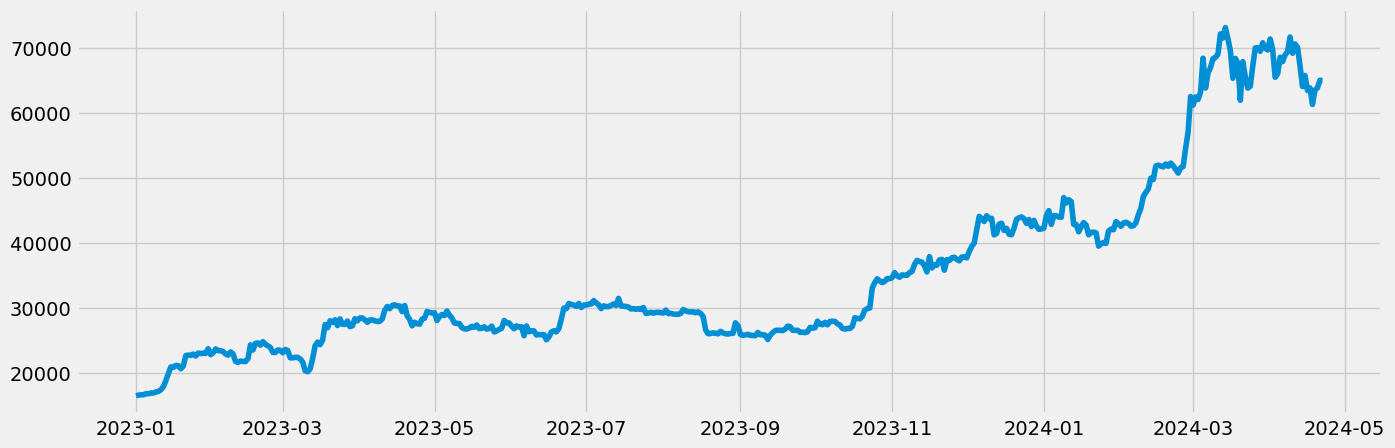

In [37]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data_sub)

### This line graph shows that as the months increase, the bitcoin also increases as well. 

In [38]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

value    0
dtype: int64

In [39]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

1

## 3. Time-series analysis: decomposition

In [40]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [44]:
# Decompose the time series using an additive model with the specified period (I got a help from ChatGPT)
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=12)

In [45]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

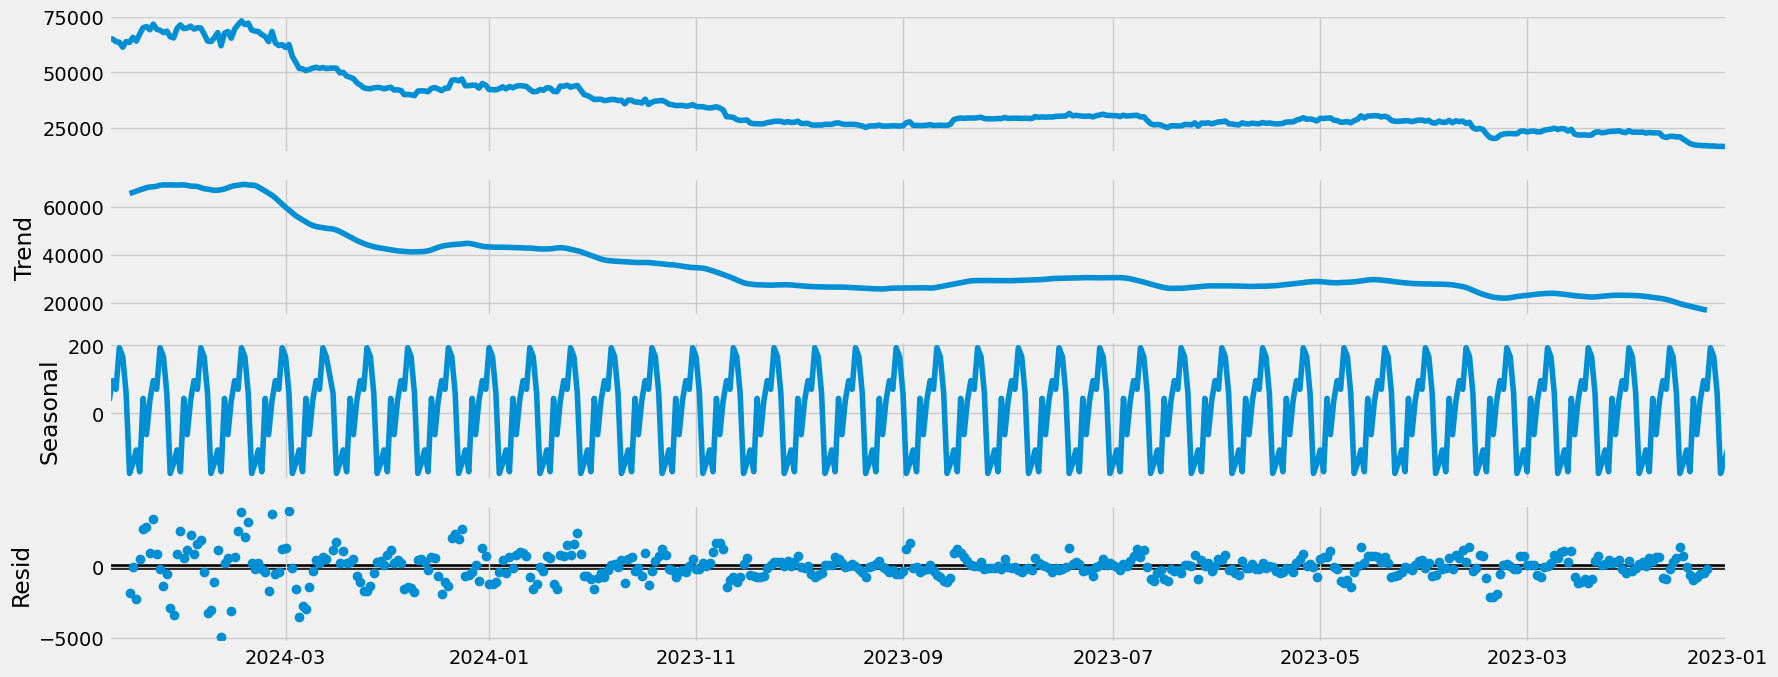

In [46]:
# Plot the separate components

decomposition.plot()
plt.show()

### The trendline in the second graph shows a increasing trend. The line trends to gradually increase from  2023-9 to 2024-03. 

### The seasonality graph shows that there are seasonal flucations every few months. Since there is a trend and seasonality, we can conclude that this is a non-stationary data. 

### The final graph on the bottom shows the residual data after the trend and seasonality have retrived. a majority of the points in the graph are above zero, except for the data near 2023-03 to 2023-01 where the bitcoin values were higher. 

## 4. Testing for stationarity

In [48]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.420927
p-value                          0.135917
Number of Lags Used             14.000000
Number of Observations Used    462.000000
Critical Value (1%)             -3.444584
Critical Value (5%)             -2.867816
Critical Value (10%)            -2.570113
dtype: float64


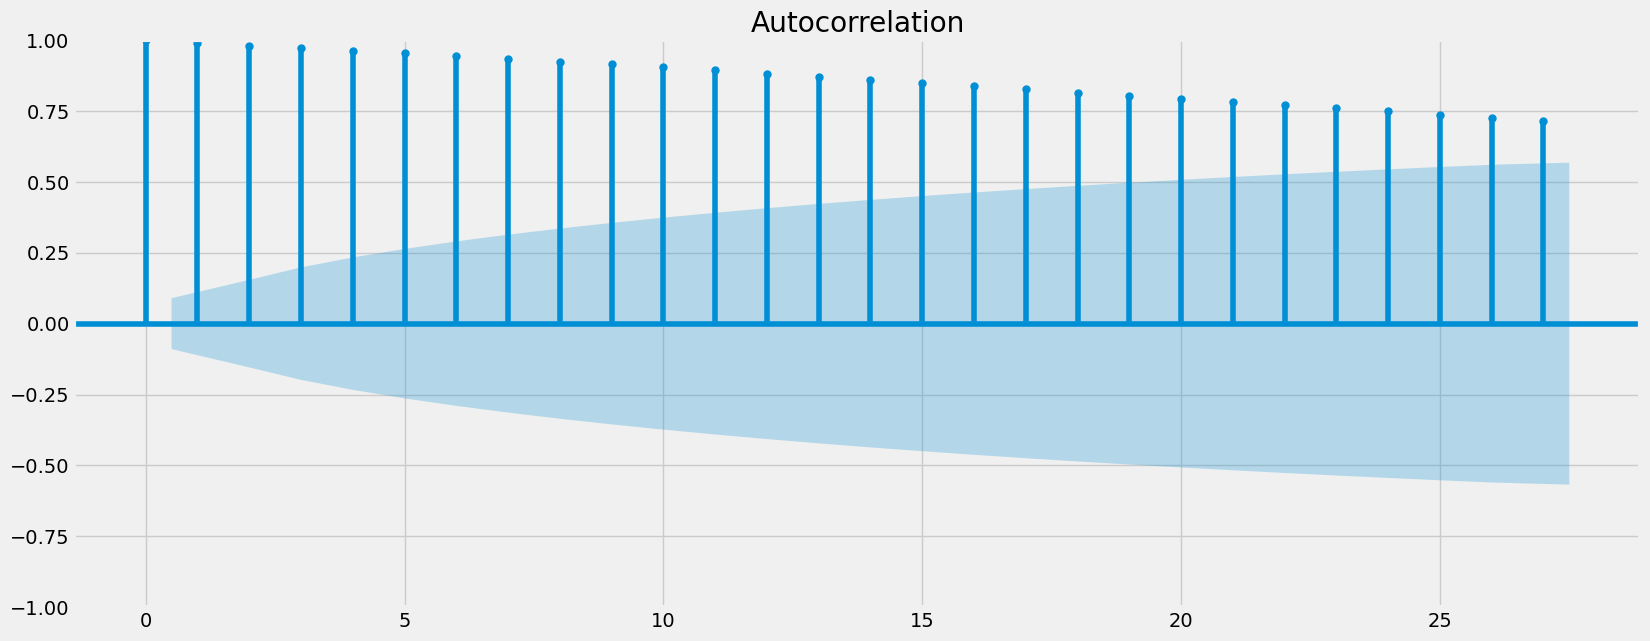

In [49]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

#### The lags in this time series are greatly connected to one another, as shown by the bars above the blue confidence interval area. This proves the time series is not stationary.

## 5. Stationarizing the data

In [50]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [51]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [52]:
data_diff.head()

,value
datetime,
2024-04-21,41.92
2024-04-20,-1168.16
2024-04-19,-315.86
2024-04-18,-2227.18
2024-04-17,2540.41


In [53]:
data_diff.columns

Index(['value'], dtype='object')

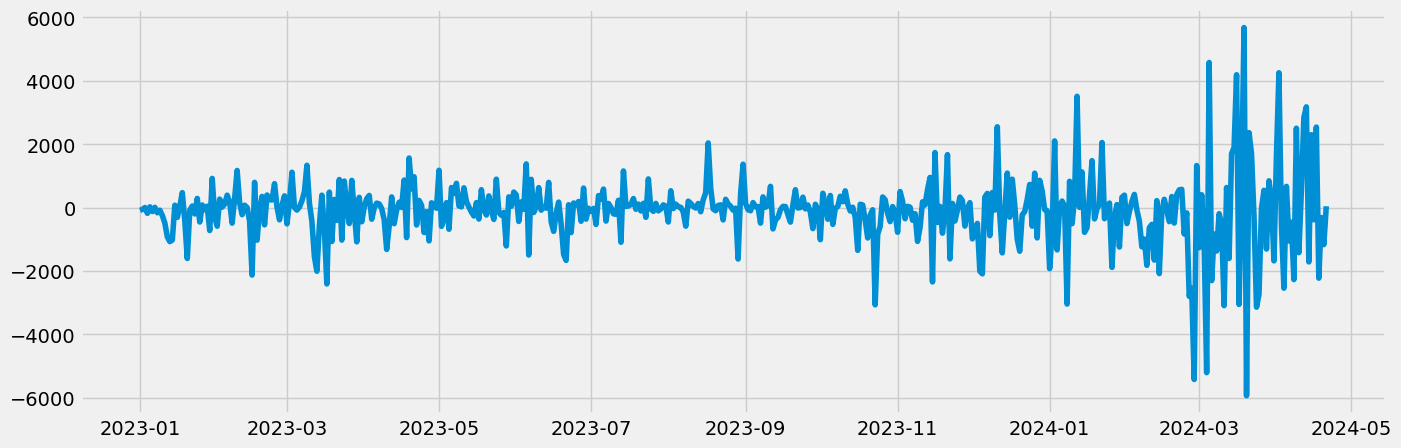

In [54]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

### Rerunning the Dickie-Fuller test

In [55]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.926297
p-value                          0.000031
Number of Lags Used             13.000000
Number of Observations Used    462.000000
Critical Value (1%)             -3.444584
Critical Value (5%)             -2.867816
Critical Value (10%)            -2.570113
dtype: float64


#### The test statistic is now smaller than the 5% critical value (or any other critical value). The p-value is 0.000031 (in actual numbers), which is less than 0.05. Now I may reject the null hypothesis and assume that the data is steady.

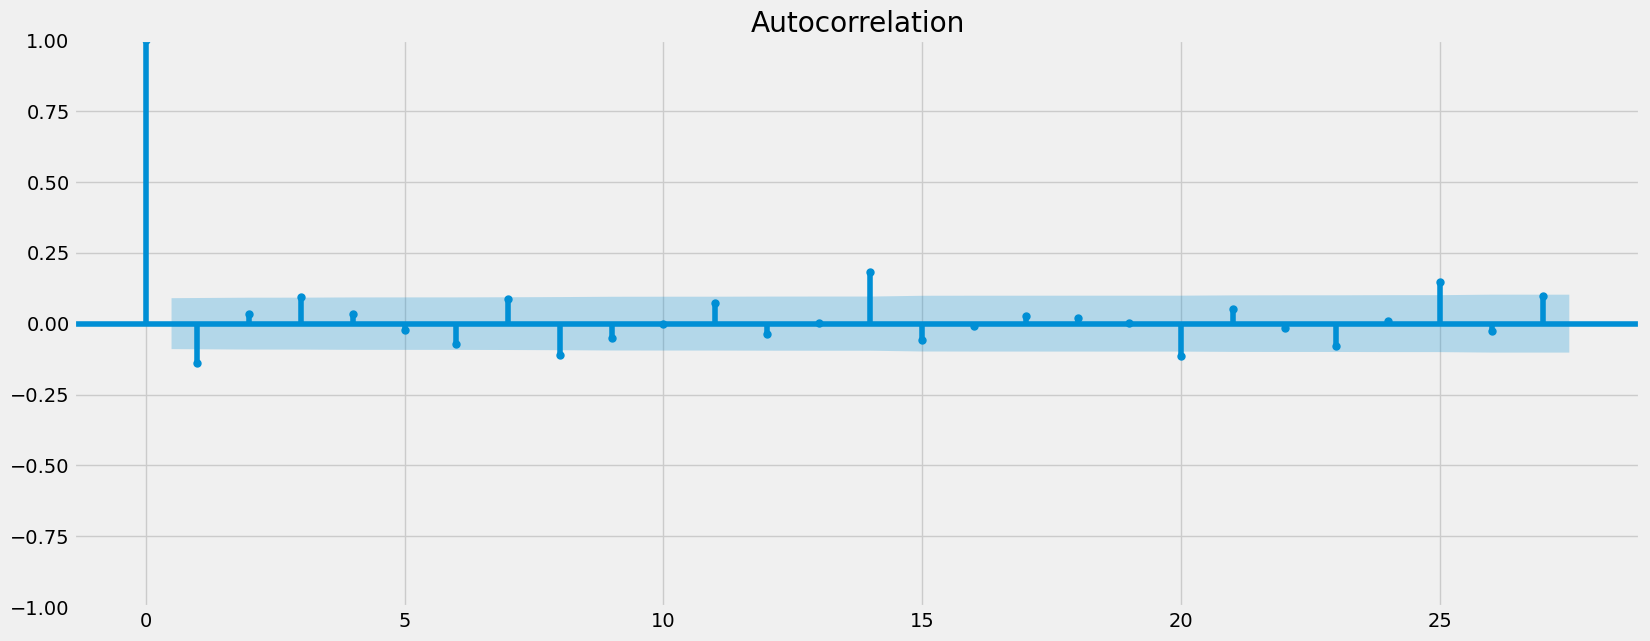

In [56]:
# Check plot for autocorrelations
plot_acf(data_diff)
plt.show()

### The autocorrelation chart above demonstrates that autocorrelations are currently very low, and the data is stationary.